# **EDA: Airline Passanger Satisfaction**
### Created By : Ali

Dataset Airline Passenger Satisfation berisi hasil survei berkaitan dengan kepuasan penumpang airline. Dalam survei tersebut banyak faktor yang ditanyakan kepada penumpang untuk dinilai dan nantinya dapat mengukur kepuasan penumpang secara keseluruhan.

# **Contents**


1. Business Problem Understanding
1. Data Understanding
1. Data Cleaning
1. Data Analysis
1. Summary

****



# **1. Business Problem Understanding**

Untuk mengetahui kondisi dan meningkatkan kualitas maskapai, perusahaan ingin mengetahui beberapa business problem berikut.

Perusahaan ingin mengetahui:
1. **Bagaimana kondisi kepuasan pelanggan?**
1. **Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?**  
1. **Kelas penumpang apa yang paling banyak merasa tidak puas?**
1. **Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?**
1. **Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?**



# **2. Data Understanding**

Dataset source : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

<br>
Notes:

*   Skala kepuasan penumpang dimulai dari 1 (tidak puas), 2 (kurang puas), 3 (netral), 4 (puas), dan 5 (sangat puas).
*   Entri 0 (nol) pada kolom kepuasan dapat diasumsikan penumpang tidak menjawab pertanyaan tersebut.

<br>

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| id | Integer | ID unik untuk tiap penumpang |
| Gender | Object | Jenis kelamin penumpang |
| Customer Type | Object | Tipe penumpang |
| Age | Integer | Usia penumpang |
| Type of Travel | Object | Tipe perjalanan |
| Class | Object | Kelas penerbangan |
| Flight Distance | Integer | Jarak penerbangan |
| Inflight wifi service | Integer | kepuasan terhadap layanan wifi selama penerbangan (skala 1 - 5) |
| Departure/Arrival time convenient | Integer | kepuasan terhadap waktu kedatangan/keberangkatan (skala 1 - 5) |
| Ease of Online booking | Integer | kemudahan pemesanan online (skala 1 - 5) |
| Gate location | Integer | kepuasan terhadap lokasi gate pesawat (skala 1 - 5) |
| Food and drink | Integer | kepuasan terhadap makanan dan minuman (skala 1 - 5) |
| Online boarding | Integer | kepuasan terhadap online boarding (skala 1 - 5) |
| Seat comfort | Integer | kepuasan terhadap kenyamanan tempat duduk (skala 1 - 5) |
| Inflight entertainment | Integer | kepuasan terhadap hiburan selama penerbangan (skala 1 - 5) |
| On-board service | Integer | kepuasan terhadap on-board service (skala 1 - 5) |
| Leg room service | Integer | kepuasan terhadap leg room (skala 1 - 5) |
| Baggage handling | Integer | kepuasan terhadap penanganan bagasi (skala 1 - 5) |
| Checkin service | Integer | kepuasan terhadap check-in service (skala 1 - 5) |
| Inflight service | Integer | kepuasan terhadap pelayanan selama penerbangan (skala 1 - 5) |
| Cleanliness | Integer | kepuasan terhadap kebersihan (skala 1 - 5) |
| Departure Delay in Minutes | Integer |waktu delay keberangkatan dalam satuan menit |
| Arrival Delay in Minutes | Float |waktu delay kedatangan dalam satuan menit |
| satisfaction | Object | kepuasan penumpang secara keseluruhan (satisfied / neutral or dissatisfied) |

## 2.1. Import Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Library
import numpy as np
import pandas as pd

# Set max columns
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2.2. Loading Dataset

In [2]:
df = pd.read_csv('airline_passanger_satisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Dataset ini sebenarnya berisi 103904 baris dan 24 kolom, kolom 'Unnamed: 0' sebenarnya adalah index dari data dan terduplikasi oleh index yang dibuat dari dataFrame sehingga berikutnya kolom 'Unnamed: 0' akan didrop. Hal ini disebabkan karena kolom index tidak diberi nama.

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}\n')

df.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset df adalah (103904, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-

In [5]:
# Display unique items from each column
def display_unique(df):
  listUniqueItem = []
  for col in df.columns :
      listUniqueItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

  tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'null', 'Unique Sample'],
                      data=listUniqueItem)
  return tableDesc

In [6]:
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,id,103904,0,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
1,Gender,2,0,"[Male, Female]"
2,Customer Type,2,0,"[Loyal Customer, disloyal Customer]"
3,Age,75,0,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
4,Type of Travel,2,0,"[Personal Travel, Business travel]"
5,Class,3,0,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,0,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
7,Inflight wifi service,6,0,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,0,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,0,"[3, 2, 5, 4, 1, 0]"


# **3. Data Cleaning & Preprocessing**

## 3.1. Statistics Summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


Secara umum, kita bisa melihat bahwa:
* dataset airline passenger satisfaction memiliki 24 kolom dan 103904 baris
* kolom `id` berisikan id unik untuk tiap penumpang, maka kolom ini kurang relevan dalam analisis dan bisa dihapus. Setelah dicek tidak ada data yang duplikat pada kolom ini sehingga tidak ada data terduplikasi untuk analisis.
* kolom `Arrival Delay in Minutes` memiliki data kosong sebanyak 310 data. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Bagian tingkat kepuasan penumpang pada beberapa faktor (`Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness`) terdapat angka 0 (diasumsikan tidak mengisi survei) dimana seharusnya jika penumpang mengisi survei rentang yang diberikan adalah 1 (sangat tidak puas) - 5 (sangat puas). Sehingga angka 0 ini bisa disebut not applicable, kecuali kolom `Baggage handling` yang tidak terdapat value = 0. Sehingga perlu dilihat pengaruhnya pada masing masing faktor tersebut.

## 3.2. Missing Values
Definisi *missing value* adalah data yang tidak memiliki nilai. *Missing value* dalam dataset umumnya teridentifikasi dengan nilai - nilai tertentu. Seperti NaN (*Not a Number*), NA (*Not Available*), *Undefined*, *Unknown*, atau -1.

In [8]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values
Arrival Delay in Minutes,310,0.298352


In [9]:
kolom = df.columns
list_zero_total = []

for i in kolom:
    count_null_total = len(df[df[i]==0])
    list_zero_total.append(count_null_total)

In [10]:
df_count0 = pd.DataFrame({'kolom' : kolom,
                          'count 0' : list_zero_total,})
df_count0

,kolom,count 0
0,id,0
1,Gender,0
2,Customer Type,0
3,Age,0
4,Type of Travel,0
5,Class,0
6,Flight Distance,0
7,Inflight wifi service,3103
8,Departure/Arrival time convenient,5300
9,Ease of Online booking,4487


In [11]:
#Input missing value pada kolom 'Arrival Delay in Minutes' dengan nilai median.
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

## 3.3. Data Duplicate
Data duplikat adalah data yang sama tersimpan berulang di dalam dataset. Kita akan mengecek jumlah *true duplicates*, yaitu baris data yang setiap kolomnya persis sama dengan data di baris lainnya. *True duplicates* umumnya terjadi karena *error* pada saat memasukkan, pengumpulan, atau penggabungan data. Karena *true duplicates* tidak memberikan informasi tambahan dan dapat membuat hasil yang bias maka data ini akan dihapus.

In [12]:
# Check for duplicated rows
print('Number of duplicated rows = ', df.duplicated().sum())

Number of duplicated rows =  0


## 3.4. Satisfaction Factor

Kita akan fokus ke bagian faktor kepuasan penumpang kolom `Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness` (14 kolom)

In [13]:
satisfaction_factor = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                       'Checkin service', 'Inflight service', 'Cleanliness']

Kita tidak menggunakan value 0 untuk menghitung nilai average satisfation dari masing masing kolom. Kita ingin menghitung nilai average satisfaction sebagai parameter apakah faktor tersebut sudah dianggap puas oleh penumpang (nilai average terendah dari banyak faktor tersebut menandakan faktor tersebut perlu ditingkatkan kualitas pelayanannya)

In [14]:
list_average_noNull = []

for i in satisfaction_factor:
    factor_avg_noNull = df[i].drop(df[df[i] == 0].index).mean()
    list_average_noNull.append(factor_avg_noNull)

In [15]:
df_factor_mean = pd.DataFrame({'kolom' : satisfaction_factor,
                               'Average' : list_average_noNull,})

df_factor_mean.sort_values(['Average'], ascending=True, ignore_index=True)

,kolom,Average
0,Inflight wifi service,2.813712
1,Ease of Online booking,2.881328
2,Gate location,2.976911
3,Food and drink,3.205430
4,Departure/Arrival time convenient,3.224788
5,Cleanliness,3.286730
6,Checkin service,3.304322
7,Online boarding,3.328147
8,Inflight entertainment,3.358610
9,Leg room service,3.366347


Dari hasil perhitungan rata-rata didapatkan
Top 3 terendah adalah faktor `Infligt wifi service , Ease of Online booking, Gate location`
Top 3 terbaik adalah faktor `Inflight service, Baggage handling, Seat comfort`. Untuk visualisasi akan ditampilkan pada bagian Data Analysis


# **4. Data Analysis**

## 4.1. Bagaimana kondisi kepuasan pelanggan ?


Untuk mengetahui kondisi dan persebaran kepuasan pelanggan baik yang satisfied maupun yang non satisfied.

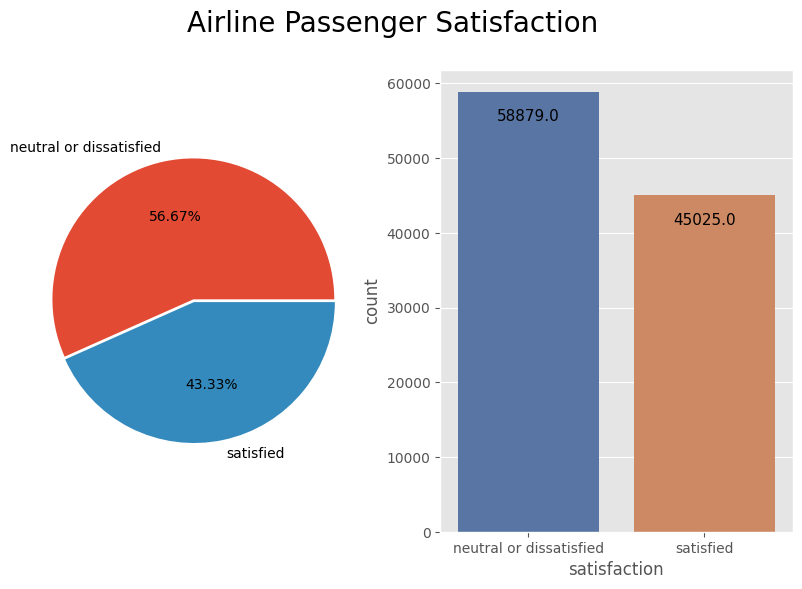

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6)).suptitle('Airline Passenger Satisfaction', fontsize=20)

plt.subplot(1,2,1)
plt.pie(df['satisfaction'].value_counts(), labels=['neutral or dissatisfied','satisfied'], autopct='%.2f%%',
        explode=(0.01,0.01))

plt.subplot(1,2,2)
ax=sns.countplot(x=df['satisfaction'], data=df, palette='deep');
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)

plt.show()

Secara general berdasarkan grafik didapatkan informasi sebanyak 58.879 dari 103.904 penumpang (setara dengan 56,67%) merasa netral atau tidak puas terhadap pelayanan yang diberikan oleh maskapai penerbangan.

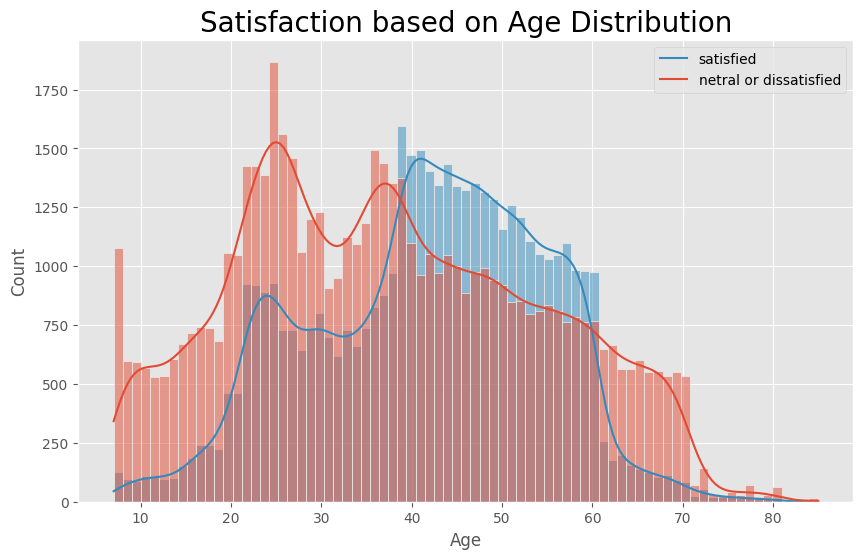

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Age'], hue=df['satisfaction'], kde=True)
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Age Distribution', fontsize=20)
plt.show()

Jika kita meminjau pada rentang umur 20-60 tahun (dominan pada distribusi), penumpang yang merasa netral or disatisfied memiliki kecenderungan lebih banyak pada rentang umur sekitar 20-40 tahun, sedangkan penumpang yang merasa puas terhadap pelayanan yang diberikan memiliki kecenderungan lebih banyak berada pada rentang umur 40-60 tahun. ***Segmentasi umur tersebut akan memberikan tanda bahwa maskapai perlu melakukan pendekatan atau perbaikan layanan yang lebih cocok untuk rentang umur 20-40 tahun***. Dimana selanjutnya akan dilihat faktor apa saja yang sebenernya sangat berpengaruh terhadap kepuasan penumpang secara keseluruhan

## 4.2. Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?


In [18]:
df_factor_sorted = df_factor_mean.sort_values(['Average'], ascending=True, ignore_index=True)
df_factor_sorted

,kolom,Average
0,Inflight wifi service,2.813712
1,Ease of Online booking,2.881328
2,Gate location,2.976911
3,Food and drink,3.205430
4,Departure/Arrival time convenient,3.224788
5,Cleanliness,3.286730
6,Checkin service,3.304322
7,Online boarding,3.328147
8,Inflight entertainment,3.358610
9,Leg room service,3.366347


Faktor dengan penilaian pelayanan terbaik:

1. Inflight service
2. Baggage Handling
3. Seat comfort

Faktor dengan penilaian pelayanan terburuk:

1. Inflight wifi service
2. Ease of Online booking
3. Gate location

Rekomendasi:

- Inflight wifi service : faktor ini dapat diperbaiki dengan meningkatkan kualitas wifi yang disediakan oleh maskapai, hal ini dirasa cukup penting karena penggunaan wifi memiliki demand yang tinggi saat travel khususnya di pesawat karena tidak bisa menggunakan mobile data.

- Ease of Online booking : faktor ini dapat diperbaiki dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date. Atau jika memang sudah ada aplikasi online booking maka perlu dikembangkan aplikasinya sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking maupun online boarding (lebih user friendly).

- Gate location : faktor lokasi gate dapat diadjust agar tidak terlalu jauh dari pesawat sehingga tidak memerlukan waktu dan tenaga yang lebih banyak untuk mobilisasi dari gate ke pesawat. Menambahkan fasilitas shuttle bus untuk lokasi gate dan pesawat yang jauh juga dapat menjadi opsi.

Note : Dalam kondisi real, untuk menentukan faktor mana yang sebaiknya ditingkatkan juga bergantung oleh cost yang dibutuhkan, misal saat menyediakan shuttle bus mungkin membutuhkan cost yang lebih banyak dibandingkan meningkatkan kualitas wifi saat penerbangan. Hal tersebut yang perlu menjadi pertimbangan maskapai untuk menentukan faktor mana yang perlu diprioritaskan dan memberikan dampak peningkatan yang signifikan.

## 4.3. Kelas penumpang apa yang paling banyak merasa tidak puas?

In [19]:
# Persebaran kepuasan penumpang berdasarkan kelas penumpang dalam persentase
pd.crosstab(df['Class'], df['satisfaction'], normalize='index').round(2)*100

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,31.0,69.0
Eco,81.0,19.0
Eco Plus,75.0,25.0


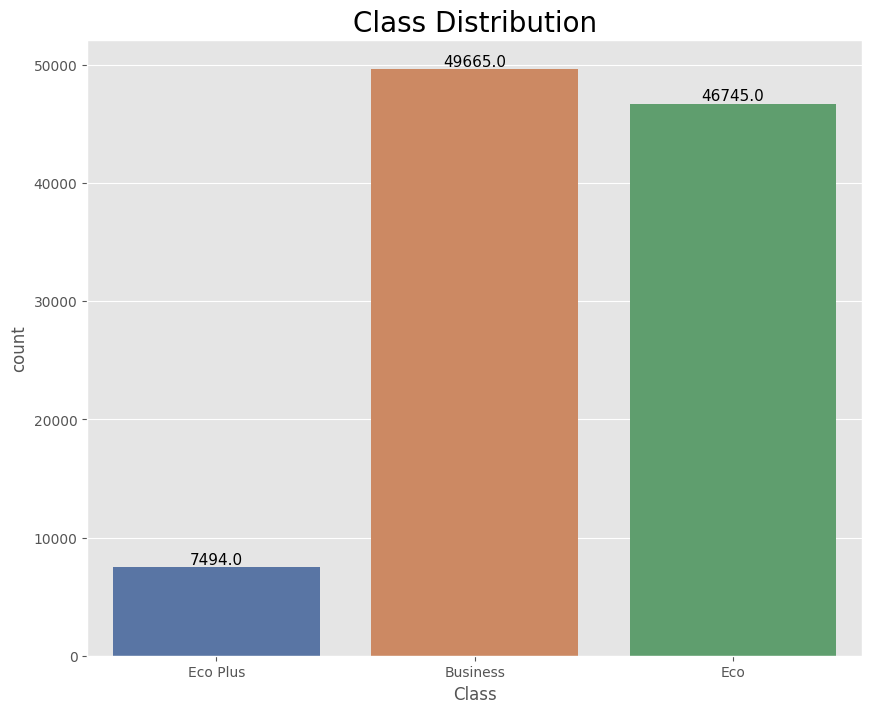

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Class', palette='deep')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Class Distribution', fontsize=20)
plt.show()

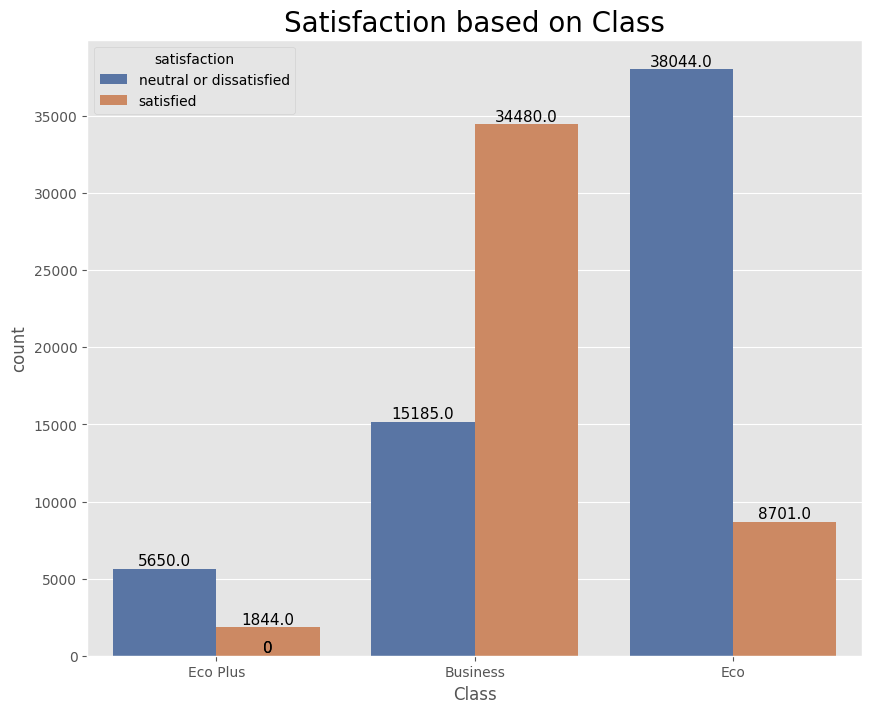

In [21]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Class',hue='satisfaction', palette='deep')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Satisfaction based on Class', fontsize=20)
plt.show()

Dari tabel dan visualisasi dapat didapatkan informasi bahwa penumpang kelas bisnis lebih banyak merasa puas (69%) dibanding merasa netral atau tidak puas (31%). Sedangkan 25% penumpang kelas eco plus merasa puas dan 75% merasa netral atau tidak puas. Lalu untuk hanya 19% penumpang kelas eco yang merasa puas sedangkan sisanya (81%) merasa tidak puas.

Rekomendasi :

Oleh karena itu, segmentasi kelas pesawat yang perlu diprioritaskan untuk peningkatan adalah kelas eco karena pengguna kelas eco adalah pengguna terbanyak setelah kelas bisnis dan penumpang paling banyak merasa netral atau tidak puas. Kemudian maskapai juga mengacu/merefer kepada servis kelas bisnis yang dinilai memuaskan oleh penumpang dengan kembali lagi tetap memperhatikan dan menghitung cost yang dibutuhkan

## 4.4. Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?

In [22]:
pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index').round(2)*100

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.0,48.0
disloyal Customer,76.0,24.0


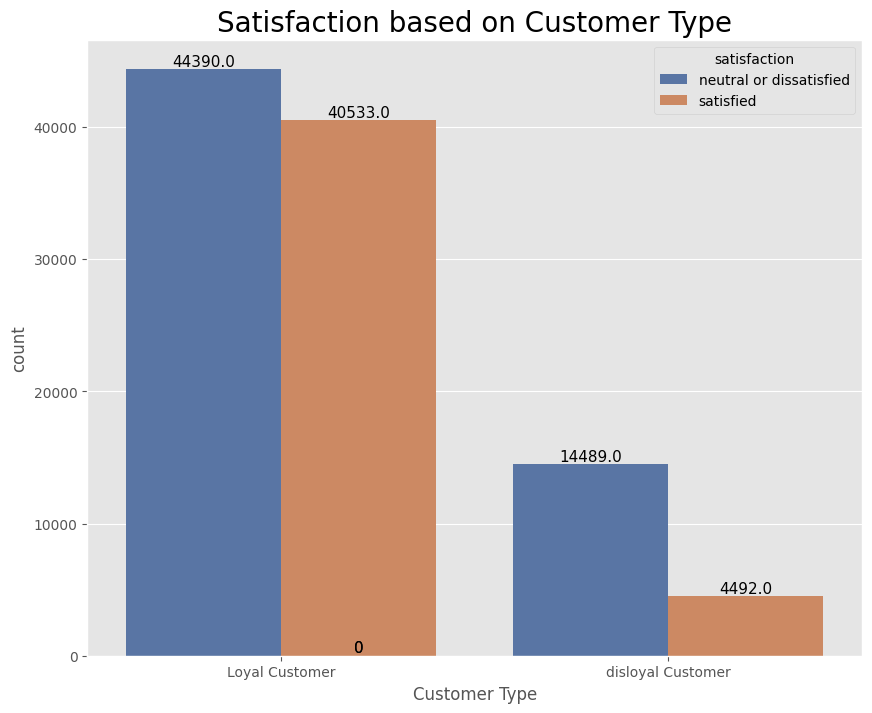

In [23]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Customer Type',hue='satisfaction', palette='deep')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Satisfaction based on Customer Type', fontsize=20)
plt.show()

Dari data diatas, seluruh customer memeiliki kecenderungan menilai pelayanan berupa netral atau tidak puas. Proporsi Disloyal customer yang memilih netral atau tidak puas cukup besar yaitu 76%. Sedangkan proporsi Loyal customer sebanyak 52%. Loyal Customer lebih banyak dibanding disloyal customer, hal ini dapat jadi pertanda bahwa lebih banyak customer lama yang menggunakan pelayanan maskapai, dan sedikitnya customer baru. Hal ini menunjukkan kualitas pelayanan perlu direview karena tidak berbanding lurus dengan ekspektasi dari pengguna baru atau penguna yang pertama kali menggunakan maskapai ini (disloyal customer).

Rekomendasi:

Perusahaan juga harus memperbaiki pelayanan dan mencari strategi marketing baru agar customer baru datang dan disloyal customer dapat convert menjadi loyal customer. Selain itu maskapai juga dapat mempertimbangkan pendekatan memberikan reward bagi disloyal customer untuk bisa kembali menggunakan maskapai tersebut.

## 4.5. Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?

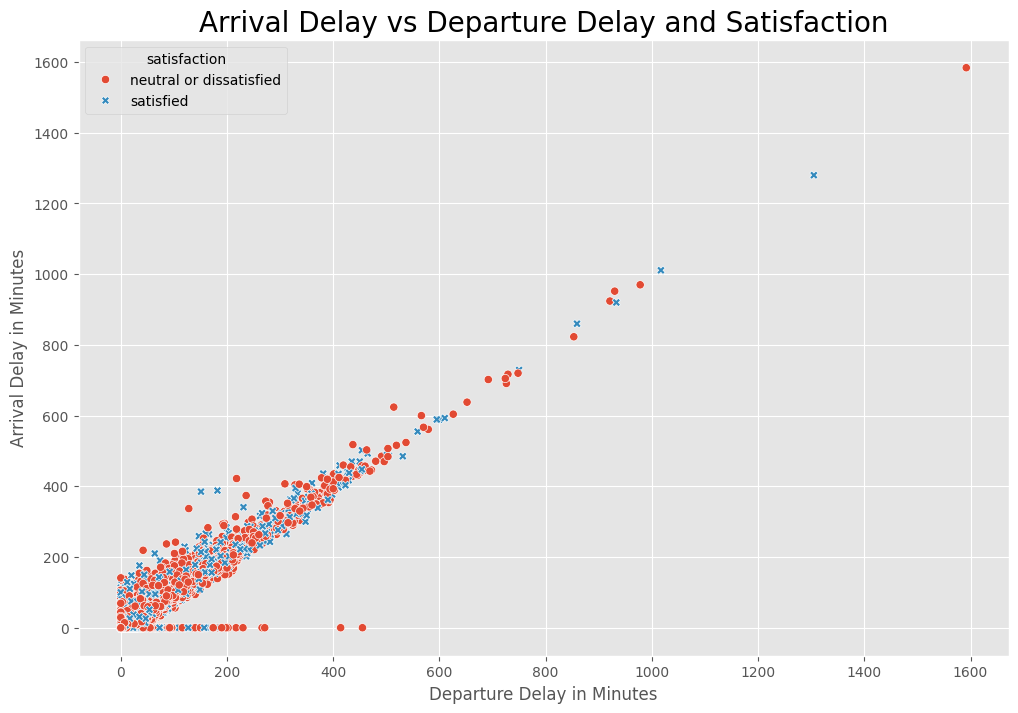

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df,hue='satisfaction',
                style='satisfaction')
plt.title('Arrival Delay vs Departure Delay and Satisfaction', fontsize=20)
plt.show()

Berdasarkan scatterplot di atas, waktu Keterlambatan pesawat saat kedatangan maupun keberangkatan cenderung tidak memiliki hubungan yang signifikan dengan tingkat kepuasan pelanggan.

Rekomendasi :

Walaupun tidak ada hubungan antara waktu keterlambatan dengan kepuasan pelanggan, namun maskapai penerbangan tetap harus memberikan kompensasi pada penumpang jika melewati menit tertentu.


# **5. Summary**

1. **Bagaimana kondisi kepuasan pelanggan ?**

- Sebanyak 58.879 dari 103.904 penumpang (56,67% penumpang) merasa netral atau tidak puas terhadap pelayanan yang diberikan oleh maskapai penerbangan.
- Penumpang yang merasa netral or disatisfied memiliki kecenderungan lebih banyak pada rentang umur sekitar 20-40 tahun, sedangkan penumpang yang merasa puas terhadap pelayanan yang diberikan memiliki kecenderungan lebih banyak berada pada rentang umur 40-60 tahun.

2. **Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?**

- 3 faktor dengan penilaian pelayanan terbaik: Inflight service, Baggage Handling, dan Seat comfort.

- 3 faktor dengan penilaian pelayanan terburuk: Inflight wifi service, Ease of Online booking, Gate location.

- Maskapai perlu lebih memerhatikan 3 faktor dengan penilaian pelayan terburuk untuk bisa diperbaiki pelayanannya guna meningkatkan kepuasan penumpang.
Rekomendasi:

  - Inflight wifi service : faktor ini dapat diperbaiki dengan meningkatkan kualitas wifi yang disediakan oleh maskapai.

  - Ease of Online booking : faktor ini dapat diperbaiki dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date. Atau jika memang sudah ada aplikasi online booking maka perlu dikembangkan aplikasinya sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking maupun online boarding (lebih user friendly).

  - Gate location : faktor lokasi gate dapat diadjust agar tidak terlalu jauh dari pesawat sehingga tidak memerlukan waktu dan tenaga yang lebih banyak untuk mobilisasi dari gate ke pesawat. Menambahkan fasilitas shuttle bus untuk lokasi gate dan pesawat yang jauh juga dapat menjadi opsi.

3. **Kelas penumpang apa yang paling banyak merasa tidak puas?**

- Kelas penumpang eco merupakan kelas yang paling banyak merasa tidak puas yaitu sebanyak 38.044 penumpang atau setara dengan 81% penumpang kelas eco merasa tidak puas.

- Rekomendasi:
Segmentasi kelas pesawat yang perlu diprioritaskan untuk peningkatan adalah kelas eco karena pengguna kelas eco adalah pengguna terbanyak setelah kelas bisnis dan penumpang paling banyak merasa netral atau tidak puas, agar dampak yang diberikan bisa berpeluang lebih banyak untuk memperbaiki kepuasan pelanggan.

4. **Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?**

- Dapat dilihat bahwa Loyal Customer dan Disloyal Customer, keduanya memeiliki kecenderungan menilai pelayanan berupa netral atau tidak puas. Proporsi Disloyal Customer yang memilih netral atau tidak puas cukup besar yaitu 76%. Sedangkan proporsi Loyal customer sebanyak yang merasa netral atau tidak puas adalah 52%. Dari hasil pengujian statistik dapat dipahami bahwa tipe customer mempengaruhi kepuasan penumpang.

- Rekomendasi:
Dapat dipahami bahwa perusahaan juga harus memperbaiki pelayanan dan mencari strategi marketing baru agar customer baru datang dan disloyal customer dapat convert menjadi loyal customer. Selain itu maskapai juga dapat mempertimbangkan pendekatan memberikan reward bagi disloyal customer untuk bisa kembali menggunakan maskapai tersebut, contoh menggunakan fitur Miles.


5. **Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?**

- Waktu Keterlambatan pesawat saat kedatangan maupun keberangkatan cenderung tidak memiliki hubungan yang signifikan dengan tingkat kepuasan pelanggan.

- Rekomendasi :
Walaupun tidak ada hubungan antara waktu keterlambatan dengan kepuasan pelanggan, namun maskapai penerbangan tetap harus memberikan kompensasi pada penumpang jika melewati menit tertentu.

